## O Modelo de Solow 
Primeiramente antes de entrarmos no programa e na simulação em si, precisamos definir quais são os parâmetros do modelo de Solow e explicar cada um. 

A equação fundamental do modelo de solow é:
\begin{equation}
k' = sf(k) - [\delta + \mu]k
\end{equation}
Em que $f(k)$ pode ser descrito como o PIB per Capita, ou no termo matematico adequado $y$. 

$s$ é a nossa propensão marginal a poupar.

$\delta$ é a depreciação 

$\mu$ é a taxa de crescimento populacional 

E por fim, $k$ é o capital per capita e $k'$ é a sua variação.

Teoricamente, o modelo de Solow se refere ao modelo Mainstream, ou Ortodoxo, de crescimento. Tendo como base principalmente uma função de produção, no modelo simulado tratamos como uma função que só possui dois insumos, ou fatores de produção. o Capital e o Trabalho. 

Esse modelo busca principalmente, e aqui é também o objetivo dessa simulação em compreender a trajetória do Capital per Capita, a variável que explica o desempenho da Renda per Capita.

In [34]:
# Importando as bibliotecas necessárias
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

Nosso objetivo com essa simulação é encontrar o $k_{ss}$, isto é, o nosso $k$ do estado estacionário que ocorre quando $k' = 0$. Econtrando o $k_{ss}$ compreendemos melhor a trajetória de $k$.

Para isso, iremos definir como tempo inicial o tempo $t_{0} = 0$ e fazer ele para um horizonte muito longo, com o tempo final $t = 300$. Assim podemos definir nossas variáveis como:


*   Taxa de Variação do $k$, isso é, $k'$:
\begin{equation} 
k' = ys -[\delta + \mu]k
\end{equation}

*   O $f(k)$, o nosso produto $y$: 
\begin{equation}
y = Ak^{\alpha}
\end{equation}

*   O consumo $C$: 
\begin{equation}
C = y(1 - s)
\end{equation}


*   A poupança $S$:
\begin{equation}
S = ys
\end{equation}



## Primeiramente, iremos fazer nossa simulação para os parâmetros $A$, $s$ e $k$, $\delta$ e $\mu$  definidos previamente. 

In [35]:
# Definindo os parâmetros 
A = 60 #Produtividade total dos fatores
s = 0.15 #Propensão marginal a poupar 
delta = 0.08 #Depreciação 
mu = 0.1 # Taxa de Crescimento Populacional
alfa = 0.3

In [36]:
#Criando matrizes e arrays para as variáveis 
# Array do Tempo
Tempo = np.array(np.arange(0,301)) #Essa operação cria um array em uma operação que vai de 0 até o tempo final em um passso de um a um

# Inicialmente criaremos uma matriz de zeros para cada componente da simulação, iremos preencher elas com suas operações no bloco seguinte

# Matriz do k 
k = np.zeros([301,1],float)
# Matriz do y 
y = np.zeros([301,1],float)
# Matriz do c
C = np.zeros([301,1],float)
# Matriz do S
S = np.zeros([301,1],float)
# Matriz da Variação do k
Variacao_k = np.zeros([301,1],float)

In [38]:
# Com as matrizes definidas, podemos preencher elas usando loops for 
for x in range(0,301):                                     # Loop geral para as operações, esse loop coordena que todas elas operem para cada valor do i
  for i in range(0,300):                                   
    k[i] = 50.0                                            #Configurando o nosso k inicial para 50
    k_novo = np.copy(k)                                    #criando uma nova matriz copiada da matriz com o k inicial correto
  for i in range(1,301):                                   #Como o zero já esta definido, aqui iniciamos a partir do 1
    k_novo[i] = k[i-1] + Variacao_k[i-1]                   #Usando a nova matriz criada anteriormente e aplicando os novos valores 
    k = np.copy(k_novo)                                    #voltando para a matriz k 
# Loop para definir a variação do k 
  for i in range(0,301):
    Variacao_k[i] = y[i]*s - (delta + mu)*k[i]
# Loop para definir o y 
  for i in range(0,301):
    y[i] = A*(np.power(k[i],alfa))
# Loop para definir o C 
  for i in range(0,301):
    C[i] = y[i]*(1 - s)
# Loop para definir o S
  for i in range(0,301):
    S[i] = y[i]*s

In [39]:
# Transformando todas as nossas varíaveis calculadas antes em arrays 
k = np.array(k)
y = np.array(y)
C = np.array(C)
S = np.array(S)
Variacao_k = np.array(Variacao_k)
print(k.ndim)

2


In [40]:
# Como nossos arrays são bidimensionais precisamos fazer um reshape de 2D para 1D
# Usando o comando reshape 
k = np.reshape(k,301)
y = np.reshape(y,301)
C = np.reshape(C,301)
S = np.reshape(S,301)
Variacao_k = np.reshape(Variacao_k,301)

In [41]:
# Criando o dataframe com um dicionário para as colunas já definidas
data_modelo_Solow = pd.DataFrame(index = Tempo)
data_modelo_Solow["Tempo"] = pd.Series(Tempo)
data_modelo_Solow["k"] = pd.Series(k)
data_modelo_Solow["y"] = pd.Series(y)
data_modelo_Solow["C"] = pd.Series(C)
data_modelo_Solow["S"] = pd.Series(S)
data_modelo_Solow["Taxa de Variação do K"] = pd.Series(Variacao_k)
data_modelo_Solow

,Tempo,k,y,C,S,Taxa de Variação do K
0,0,50.000000,194.018102,164.915387,29.102715,2.010272e+01
1,1,70.102715,214.719606,182.511665,32.207941,1.958945e+01
2,2,89.692167,231.194557,196.515374,34.679184,1.853459e+01
3,3,108.226761,244.597294,207.907700,36.689594,1.720878e+01
4,4,125.435538,255.668621,217.318328,38.350293,1.577190e+01
...,...,...,...,...,...,...
296,296,267.362200,320.834640,272.709444,48.125196,2.131628e-14
297,297,267.362200,320.834640,272.709444,48.125196,2.131628e-14
298,298,267.362200,320.834640,272.709444,48.125196,2.131628e-14
299,299,267.362200,320.834640,272.709444,48.125196,2.131628e-14


Text(0.5, 1.0, 'Simulação Computacional do k no Modelo de Solow em função do Tempo.\nFeito por Luiz Mario.')

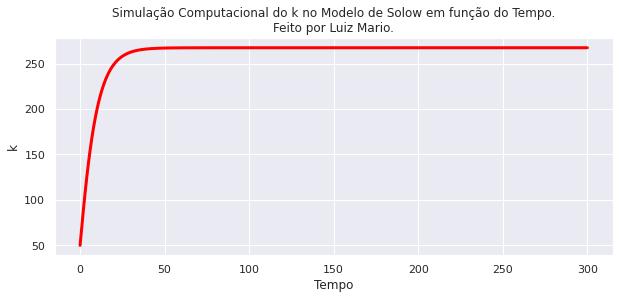

In [25]:
# Plotando o gráfico do k no decorrer do tempo 
sns.set()
sns.set(rc={"figure.figsize":(10, 4)})
sns.lineplot(data = data_modelo_Solow, x = 'Tempo', y = 'k', color = 'red', linewidth = 3, zorder = 2)
plt.title('Simulação Computacional do k no Modelo de Solow em função do Tempo.\nFeito por Luiz Mario.', loc='center')

Text(0.5, 1.0, 'Simulação Computacional do y no Modelo de Solow em função do Tempo.\nFeito por Luiz Mario.')

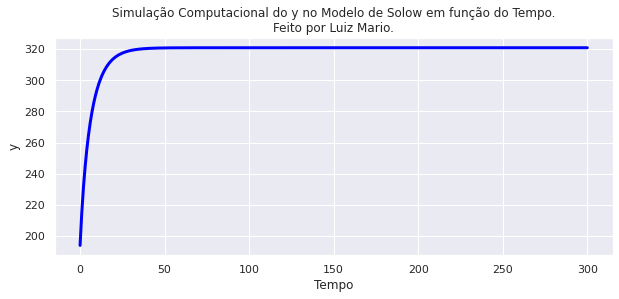

In [156]:
# Gráfico conjunto do y  
sns.set()
sns.set(rc={"figure.figsize":(10, 4)})
sns.lineplot(data = data_modelo_Solow, x = 'Tempo', y = 'y', color = 'blue', linewidth = 3, zorder = 2)
plt.title('Simulação Computacional do y no Modelo de Solow em função do Tempo.\nFeito por Luiz Mario.', loc='center')

## Brincando com choques na Poupança 
Para fazermos esses choques iremos alterar o valor da propensão marginal a poupar para 2 valores


*   $s = 0,30$
*   $s = 0,60$

Nosso interesse aqui é verificar se ocorre a maximização do consumo quando $s = \alpha$. Isto é chamado de Regra de Ouro do modelo de Solow, levando a um aumento do consumo no estado estacionário e assim a um aumento do bem-estar.



## $s = 0,30$

In [72]:
# Definindo os parâmetros 
A = 60 #Produtividade total dos fatores
s = 0.30 #Propensão marginal a poupar 
delta = 0.08 #Depreciação 
mu = 0.1 # Taxa de Crescimento Populacional
alfa = 0.3

In [73]:
#Criando matrizes e arrays para as variáveis 
# Array do Tempo
Tempo = np.array(np.arange(0,301)) #Essa operação cria um array em uma operação que vai de 0 até o tempo final em um passso de um a um

# Inicialmente criaremos uma matriz de zeros para cada componente da simulação, iremos preencher elas com suas operações no bloco seguinte

# Matriz do k 
k = np.zeros([301,1],float)
# Matriz do y 
y = np.zeros([301,1],float)
# Matriz do c
C = np.zeros([301,1],float)
# Matriz do S
S = np.zeros([301,1],float)
# Matriz da Variação do k
Variacao_k = np.zeros([301,1],float)

In [75]:
# Com as matrizes definidas, podemos preencher elas usando loops for 
for x in range(0,301):                                     # Loop geral para as operações, esse loop coordena que todas elas operem para cada valor do i
  for i in range(0,300):                                   
    k[i] = 50.0                                            #Configurando o nosso k inicial para 50
    k_novo = np.copy(k)                                    #criando uma nova matriz copiada da matriz com o k inicial correto
  for i in range(1,301):                                   #Como o zero já esta definido, aqui iniciamos a partir do 1
    k_novo[i] = k[i-1] + Variacao_k[i-1]                   #Usando a nova matriz criada anteriormente e aplicando os novos valores 
    k = np.copy(k_novo)                                    #voltando para a matriz k 
# Loop para definir a variação do k 
  for i in range(0,301):
    Variacao_k[i] = y[i]*s - (delta + mu)*k[i]
# Loop para definir o y 
  for i in range(0,301):
    y[i] = A*(np.power(k[i],alfa))
# Loop para definir o C 
  for i in range(0,301):
    C[i] = y[i]*(1 - s)
# Loop para definir o S
  for i in range(0,301):
    S[i] = y[i]*s

In [76]:
# Transformando todas as nossas varíaveis calculadas antes em arrays 
k = np.array(k)
y = np.array(y)
C = np.array(C)
S = np.array(S)
Variacao_k = np.array(Variacao_k)
print(k.ndim)

2


In [77]:
# Como nossos arrays são bidimensionais precisamos fazer um reshape de 2D para 1D
# Usando o comando reshape 
k = np.reshape(k,301)
y = np.reshape(y,301)
C = np.reshape(C,301)
S = np.reshape(S,301)
Variacao_k = np.reshape(Variacao_k,301)

In [78]:
# Criando o dataframe com um dicionário para as colunas já definidas
data_modelo_Solow_choque_1 = pd.DataFrame(index = Tempo)
data_modelo_Solow_choque_1["Tempo"] = pd.Series(Tempo)
data_modelo_Solow_choque_1["k"] = pd.Series(k)
data_modelo_Solow_choque_1["y"] = pd.Series(y)
data_modelo_Solow_choque_1["C"] = pd.Series(C)
data_modelo_Solow_choque_1["S"] = pd.Series(S)
data_modelo_Solow_choque_1["Taxa de Variação do K"] = pd.Series(Variacao_k)
data_modelo_Solow_choque_1

,Tempo,k,y,C,S,Taxa de Variação do K
0,0,50.000000,194.018102,135.812671,58.205431,4.920543e+01
1,1,99.205431,238.293329,166.805330,71.487999,5.363102e+01
2,2,152.836452,271.280973,189.896681,81.384292,5.387373e+01
3,3,206.710182,297.002299,207.901609,89.100690,5.189286e+01
4,4,258.603039,317.644498,222.351149,95.293350,4.874480e+01
...,...,...,...,...,...,...
296,296,719.685673,431.811404,302.267983,129.543421,5.684342e-14
297,297,719.685673,431.811404,302.267983,129.543421,5.684342e-14
298,298,719.685673,431.811404,302.267983,129.543421,5.684342e-14
299,299,719.685673,431.811404,302.267983,129.543421,5.684342e-14


Text(0.5, 1.0, 'Simulação Computacional do k no Modelo de Solow em função do Tempo.\nFeito por Luiz Mario.')

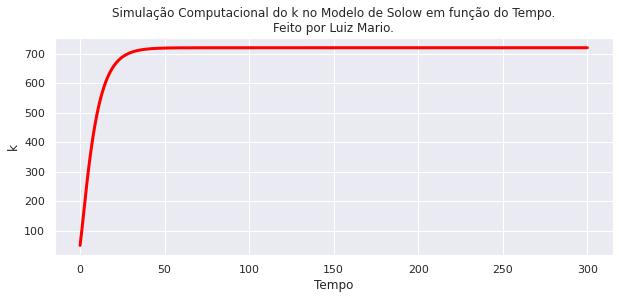

In [80]:
# Plotando o gráfico do k no decorrer do tempo 
sns.set()
sns.set(rc={"figure.figsize":(10, 4)})
sns.lineplot(data = data_modelo_Solow_choque_1, x = 'Tempo', y = 'k', color = 'red', linewidth = 3, zorder = 2)
plt.title('Simulação Computacional do k no Modelo de Solow em função do Tempo.\nFeito por Luiz Mario.', loc='center')

Text(0.5, 1.0, 'Simulação Computacional do y no Modelo de Solow em função do Tempo.\nFeito por Luiz Mario.')

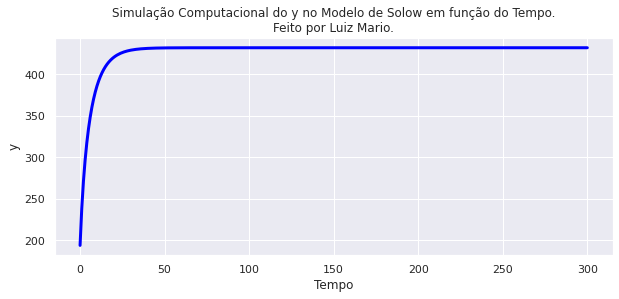

In [170]:
# Plotando o gráfico do k no decorrer do tempo 
sns.set()
sns.set(rc={"figure.figsize":(10, 4)})
sns.lineplot(data = data_modelo_Solow_choque_1, x = 'Tempo', y = 'y', color = 'blue', linewidth = 3, zorder = 2)
plt.title('Simulação Computacional do y no Modelo de Solow em função do Tempo.\nFeito por Luiz Mario.', loc='center')

## $s = 0,60$

In [5]:
# Definindo os parâmetros 
A = 60 #Produtividade total dos fatores
s = 0.60 #Propensão marginal a poupar 
delta = 0.08 #Depreciação 
mu = 0.1 # Taxa de Crescimento Populacional
alfa = 0.3

In [6]:
#Criando matrizes e arrays para as variáveis 
# Array do Tempo
Tempo = np.array(np.arange(0,301)) #Essa operação cria um array em uma operação que vai de 0 até o tempo final em um passso de um a um

# Inicialmente criaremos uma matriz de zeros para cada componente da simulação, iremos preencher elas com suas operações no bloco seguinte

# Matriz do k 
k = np.zeros([301,1],float)
# Matriz do y 
y = np.zeros([301,1],float)
# Matriz do c
C = np.zeros([301,1],float)
# Matriz do S
S = np.zeros([301,1],float)
# Matriz da Variação do k
Variacao_k = np.zeros([301,1],float)

In [8]:
# Com as matrizes definidas, podemos preencher elas usando loops for 
for x in range(0,301):                                     # Loop geral para as operações, esse loop coordena que todas elas operem para cada valor do i
  for i in range(0,300):                                   
    k[i] = 50.0                                            #Configurando o nosso k inicial para 50
    k_novo = np.copy(k)                                    #criando uma nova matriz copiada da matriz com o k inicial correto
  for i in range(1,301):                                   #Como o zero já esta definido, aqui iniciamos a partir do 1
    k_novo[i] = k[i-1] + Variacao_k[i-1]                   #Usando a nova matriz criada anteriormente e aplicando os novos valores 
    k = np.copy(k_novo)                                    #voltando para a matriz k 
# Loop para definir a variação do k 
  for i in range(0,301):
    Variacao_k[i] = y[i]*s - (delta + mu)*k[i]
# Loop para definir o y 
  for i in range(0,301):
    y[i] = A*(np.power(k[i],alfa))
# Loop para definir o C 
  for i in range(0,301):
    C[i] = y[i]*(1 - s)
# Loop para definir o S
  for i in range(0,301):
    S[i] = y[i]*s

In [9]:
# Transformando todas as nossas varíaveis calculadas antes em arrays 
k = np.array(k)
y = np.array(y)
C = np.array(C)
S = np.array(S)
Variacao_k = np.array(Variacao_k)
print(k.ndim)

2


In [11]:
# Como nossos arrays são bidimensionais precisamos fazer um reshape de 2D para 1D
# Usando o comando reshape 
k = np.reshape(k,301)
y = np.reshape(y,301)
C = np.reshape(C,301)
S = np.reshape(S,301)
Variacao_k = np.reshape(Variacao_k,301)

In [12]:
# Criando o dataframe com um dicionário para as colunas já definidas
data_modelo_Solow_choque_2 = pd.DataFrame(index = Tempo)
data_modelo_Solow_choque_2["Tempo"] = pd.Series(Tempo)
data_modelo_Solow_choque_2["k"] = pd.Series(k)
data_modelo_Solow_choque_2["y"] = pd.Series(y)
data_modelo_Solow_choque_2["C"] = pd.Series(C)
data_modelo_Solow_choque_2["S"] = pd.Series(S)
data_modelo_Solow_choque_2["Taxa de Variação do K"] = pd.Series(Variacao_k)
data_modelo_Solow_choque_2

,Tempo,k,y,C,S,Taxa de Variação do K
0,0,50.000000,194.018102,77.607241,116.410861,1.074109e+02
1,1,157.410861,273.691720,109.476688,164.215032,1.358811e+02
2,2,293.291938,329.868836,131.947534,197.921302,1.451288e+02
3,3,438.420691,372.150462,148.860185,223.290277,1.443746e+02
4,4,582.795244,405.327481,162.130993,243.196489,1.382933e+02
...,...,...,...,...,...,...
296,296,1937.250172,581.175052,232.470021,348.705031,1.136868e-13
297,297,1937.250172,581.175052,232.470021,348.705031,1.136868e-13
298,298,1937.250172,581.175052,232.470021,348.705031,1.136868e-13
299,299,1937.250172,581.175052,232.470021,348.705031,1.136868e-13


Text(0.5, 1.0, 'Simulação Computacional do k no Modelo de Solow em função do Tempo.\nFeito por Luiz Mario.')

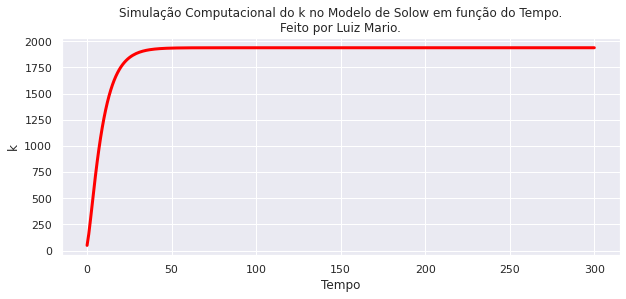

In [14]:
# Plotando o gráfico do k no decorrer do tempo 
sns.set()
sns.set(rc={"figure.figsize":(10, 4)})
sns.lineplot(data = data_modelo_Solow_choque_2, x = 'Tempo', y = 'k', color = 'red', linewidth = 3, zorder = 2)
plt.title('Simulação Computacional do k no Modelo de Solow em função do Tempo.\nFeito por Luiz Mario.', loc='center')

Text(0.5, 1.0, 'Simulação Computacional do y no Modelo de Solow em função do Tempo.\nFeito por Luiz Mario.')

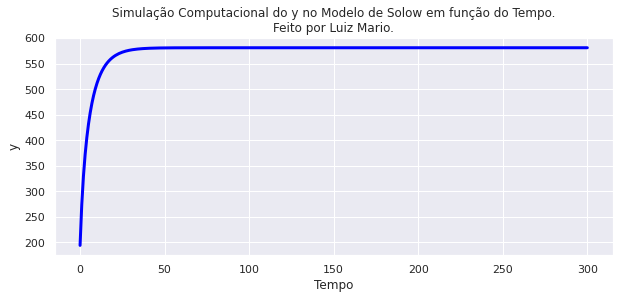

In [15]:
# Plotando o gráfico do k no decorrer do tempo 
sns.set()
sns.set(rc={"figure.figsize":(10, 4)})
sns.lineplot(data = data_modelo_Solow_choque_2, x = 'Tempo', y = 'y', color = 'blue', linewidth = 3, zorder = 2)
plt.title('Simulação Computacional do y no Modelo de Solow em função do Tempo.\nFeito por Luiz Mario.', loc='center')

## Simulação Dinâmica 
Aqui não há parâmetros fixos, todos eles são variáveis e podem ser escolhidos como valores de entrada. Porém, é necessário dizer que é só 1 valor para cada variável. 

In [ ]:
# Definindo os parâmetros - Agora eles serão valores de entrada, escolhidos pelo usuário
# Todos os valores abaixo devem ser escritos em casas decimais pois são pontos flutuantes 
A = float(input("Digite o valor da Produtividade Total dos Fatores:")) #Produtividade total dos fatores
s = float(input("Digite o valor da Propensão Marginal a Poupar:")) #Propensão marginal a poupar 
delta = float(input("Digite o valor referente à Depreciação:")) #Depreciação 
mu = float(input("Digite o valor referente à Taxa de Crescimento Populacional:")) # Taxa de Crescimento Populacional
alfa = float(input("Digite o valor referente ao Alfa do modelo:"))
k_inicial = float(input("Digite o valor referente ao Capital per Capita inicial:"))

In [ ]:
#Criando matrizes e arrays para as variáveis 
# Array do Tempo
Tempo = np.array(np.arange(0,301)) #Essa operação cria um array em uma operação que vai de 0 até o tempo final em um passso de um a um

# Inicialmente criaremos uma matriz de zeros para cada componente da simulação, iremos preencher elas com suas operações no bloco seguinte

# Matriz do k 
k = np.zeros([301,1],float)
# Matriz do y 
y = np.zeros([301,1],float)
# Matriz do c
C = np.zeros([301,1],float)
# Matriz do S
S = np.zeros([301,1],float)
# Matriz da Variação do k
Variacao_k = np.zeros([301,1],float)

In [ ]:
# Com as matrizes definidas, podemos preencher elas usando loops for 
for x in range(0,301):                                     # Loop geral para as operações, esse loop coordena que todas elas operem para cada valor do i
  for i in range(0,300):                                   
    k[i] = k_inicial                                       #Configurando o nosso k inicial para 50
    k_novo = np.copy(k)                                    #criando uma nova matriz copiada da matriz com o k inicial correto
  for i in range(1,301):                                   #Como o zero já esta definido, aqui iniciamos a partir do 1
    k_novo[i] = k[i-1] + Variacao_k[i-1]                   #Usando a nova matriz criada anteriormente e aplicando os novos valores 
    k = np.copy(k_novo)                                    #voltando para a matriz k 
# Loop para definir a variação do k 
  for i in range(0,301):
    Variacao_k[i] = y[i]*s - (delta + mu)*k[i]
# Loop para definir o y 
  for i in range(0,301):
    y[i] = A*(np.power(k[i],alfa))
# Loop para definir o C 
  for i in range(0,301):
    C[i] = y[i]*(1 - s)
# Loop para definir o S
  for i in range(0,301):
    S[i] = y[i]*s

In [ ]:
# Transformando todas as nossas varíaveis calculadas antes em arrays 
k = np.array(k)
y = np.array(y)
C = np.array(C)
S = np.array(S)
Variacao_k = np.array(Variacao_k)
print(k.ndim)

In [ ]:
# Como nossos arrays são bidimensionais precisamos fazer um reshape de 2D para 1D
# Usando o comando reshape 
k = np.reshape(k,301)
y = np.reshape(y,301)
C = np.reshape(C,301)
S = np.reshape(S,301)
Variacao_k = np.reshape(Variacao_k,301)

In [ ]:
# Criando o dataframe com um dicionário para as colunas já definidas
data_modelo_Solow_simulacao_dinamica = pd.DataFrame(index = Tempo)
data_modelo_Solow_simulacao_dinamica["Tempo"] = pd.Series(Tempo)
data_modelo_Solow_simulacao_dinamica["k"] = pd.Series(k)
data_modelo_Solow_simulacao_dinamica["y"] = pd.Series(y)
data_modelo_Solow_simulacao_dinamica["C"] = pd.Series(C)
data_modelo_Solow_simulacao_dinamica["S"] = pd.Series(S)
data_modelo_Solow_simulacao_dinamica["Taxa de Variação do K"] = pd.Series(Variacao_k)
data_modelo_Solow_simulacao_dinamica

In [ ]:
# Plotando o gráfico do k no decorrer do tempo 
sns.set()
sns.set(rc={"figure.figsize":(10, 4)})
sns.lineplot(data = data_modelo_Solow_simulacao_dinamica, x = 'Tempo', y = 'k', color = 'red', linewidth = 3, zorder = 2)
plt.title('Simulação Computacional do k no Modelo de Solow em função do Tempo.\nFeito por Luiz Mario.', loc='center')

In [ ]:
# Plotando o gráfico do y no decorrer do tempo 
sns.set()
sns.set(rc={"figure.figsize":(10, 4)})
sns.lineplot(data = data_modelo_Solow_simulacao_dinamica, x = 'Tempo', y = 'y', color = 'blue', linewidth = 3, zorder = 2)
plt.title('Simulação Computacional do y no Modelo de Solow em função do Tempo.\nFeito por Luiz Mario.', loc='center')

## Brincando com choques.
Antes de entrarmos nessa parte da simulação é importante explicar sobre o que ela se refere. 

Choque é por definição, tudo aquilo que desloca o $k$ do $k_{ss}$, deslocando ele do **Equilíbrio**.

Equilíbrio em si, se refere ao ponto onde a variável não se altera no tempo, ela permanece constante. Matematicamente é quando a derivada dessa variável em relação ao tempo se anula. 

Existem dois tipos de equilíbrio:


*   **Equilíbrio Estável**: Ocorre se depois do choque há retorno ao equilíbrio, isto é, ao $k_{ss}$. 
*   **Equilíbrio Instável**: É quando depois do choque não há retorno ao equilíbrio, criando um novo equilíbrio, um novo $k_{ss}$. 



In [ ]:
# Para realizar esse choque, substituiremos no dataframe usado na primeira parte da simulação um valor específico abaixo do Estado Estacionário.
# Para fazer isso basta olharmos no dataframe e substituirmos por qualquer valor após t = 50, isso é perceptível no gráfico 
# Substituindo vários valores pelo pandas na coluna do k com a ajuda de um loop for
for i in range(50):
  data_modelo_Solow.at[60 + i,'k'] = 100
data_modelo_Solow

Text(0.5, 1.0, 'Simulação Computacional do k em um Choque Exógeno no Modelo de Solow em função do Tempo.\nFeito por Luiz Mario.')

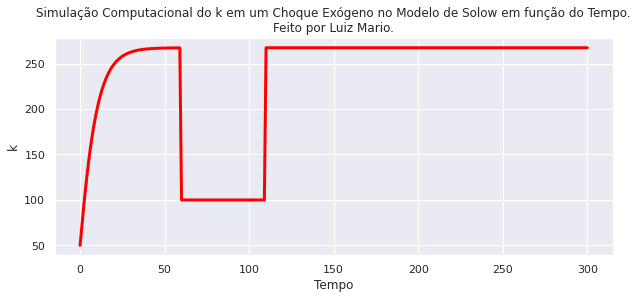

In [64]:
# Plotado o gráfico 
# Plotando o gráfico do k no decorrer do tempo 
sns.set()
sns.set(rc={"figure.figsize":(10, 4)})
sns.lineplot(data = data_modelo_Solow, x = 'Tempo', y = 'k', color = 'red', linewidth = 3, zorder = 2)
plt.title('Simulação Computacional do k em um Choque Exógeno no Modelo de Solow em função do Tempo.\nFeito por Luiz Mario.', loc='center')

In [69]:
# O mesmo ocorre com o produto y 
# Substituindo vários valores pelo pandas na coluna do k
for j in range(50):
  data_modelo_Solow.at[60 + j,'y'] = 200

Text(0.5, 1.0, 'Simulação Computacional do y em um Choque Exógeno no Modelo de Solow em função do Tempo.\nFeito por Luiz Mario.')

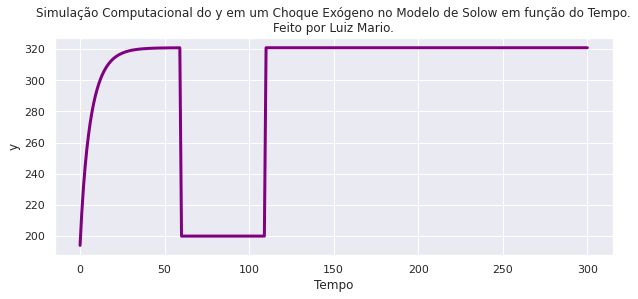

In [70]:
# Plotando o gráfico do k no decorrer do tempo 
sns.set()
sns.set(rc={"figure.figsize":(10, 4)})
sns.lineplot(data = data_modelo_Solow, x = 'Tempo', y = 'y', color = 'purple', linewidth = 3, zorder = 2)
plt.title('Simulação Computacional do y em um Choque Exógeno no Modelo de Solow em função do Tempo.\nFeito por Luiz Mario.', loc='center')